In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from collections import Counter
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score, confusion_matrix


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /Users/prithvi/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prithvi/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /Users/prithvi/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [5]:
df =pd.read_csv("spam.csv")

In [6]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"], inplace=True)

In [12]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.columns = ["Spam", "Message"]

In [14]:
df.head(5)

,Spam,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df["Spam"].unique()

array(['ham', 'spam'], dtype=object)

In [17]:
df["Spam"] = df["Spam"] == "spam"

In [18]:
df.head(5)

,Spam,Message
0,False,"Go until jurong point, crazy.. Available only ..."
1,False,Ok lar... Joking wif u oni...
2,True,Free entry in 2 a wkly comp to win FA Cup fina...
3,False,U dun say so early hor... U c already then say...
4,False,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
pd.DataFrame(df.isnull().mean()*100, columns=["Missing Values %"])

,Missing Values %
Spam,0.0
Message,0.0


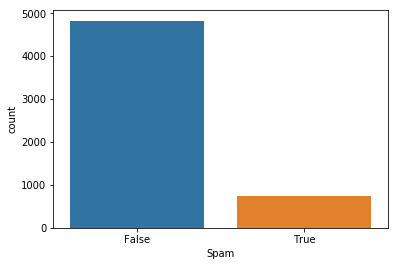

In [22]:
sns.countplot(df["Spam"])

In [23]:
print("Spam: {}%".format(round((df["Spam"].sum()*100/len(df)),1)))
print("Not Spam: {}%".format(round((100 - df["Spam"].sum()*100/len(df)),1)))

Spam: 13.4%
Not Spam: 86.6%


In [24]:
spam = df[df["Spam"] == True]


In [25]:
spam

,Spam,Message
2,True,Free entry in 2 a wkly comp to win FA Cup fina...
5,True,FreeMsg Hey there darling it's been 3 week's n...
8,True,WINNER!! As a valued network customer you have...
9,True,Had your mobile 11 months or more? U R entitle...
11,True,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,True,Want explicit SEX in 30 secs? Ring 02073162414...
5540,True,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,True,Had your contract mobile 11 Mnths? Latest Moto...
5566,True,REMINDER FROM O2: To get 2.50 pounds free call...


In [26]:
no_spam = df[df["Spam"] == False]

In [27]:
no_spam.head(5)

,Spam,Message
0,False,"Go until jurong point, crazy.. Available only ..."
1,False,Ok lar... Joking wif u oni...
3,False,U dun say so early hor... U c already then say...
4,False,"Nah I don't think he goes to usf, he lives aro..."
6,False,Even my brother is not like to speak with me. ...


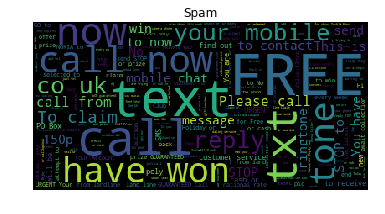

In [33]:
wc = WordCloud()
wordcloud = wc.generate(" ".join(spam["Message"].astype(str).tolist()))
plt.imshow(wordcloud)
plt.title("Spam")
plt.axis("off")
plt.show()

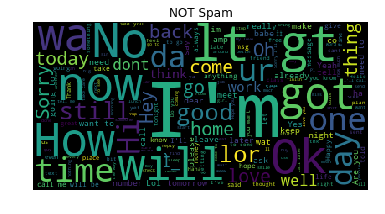

In [35]:
wc = WordCloud()
wordcloud = wc.generate(" ".join(no_spam["Message"].astype(str).tolist()))
plt.imshow(wordcloud)
plt.title("NOT Spam")
plt.axis("off")
plt.show()

In [36]:
df["Clean Message"] = df["Message"].apply(lambda row: row.translate(str.maketrans('', '', string.punctuation)).lower())

In [38]:
df["Clean Message"]

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in 2 a wkly comp to win fa cup fina...
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                  will ì b going to esplanade fr home
5569    pity  was in mood for that soany other suggest...
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: Clean Message, Length: 5572, dtype: object

In [39]:
df["Tokenized Message"] = df["Clean Message"].apply(lambda row: word_tokenize(row))

In [40]:
df["Tokenized Message"]

0       [go, until, jurong, point, crazy, available, o...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, in, 2, a, wkly, comp, to, win, f...
3       [u, dun, say, so, early, hor, u, c, already, t...
4       [nah, i, dont, think, he, goes, to, usf, he, l...
                              ...                        
5567    [this, is, the, 2nd, time, we, have, tried, 2,...
5568         [will, ì, b, going, to, esplanade, fr, home]
5569    [pity, was, in, mood, for, that, soany, other,...
5570    [the, guy, did, some, bitching, but, i, acted,...
5571                     [rofl, its, true, to, its, name]
Name: Tokenized Message, Length: 5572, dtype: object

In [41]:
stop_words = set(stopwords.words("english"))

In [42]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [45]:
def remove_stop_words(words):
  good_words=[]
  for word in words:
    if word not in stop_words:
      good_words.append(word)
  return good_words

In [46]:
df["Stop Words Removed"] = df["Tokenized Message"].apply(lambda row: remove_stop_words(row))

In [47]:
df["Stop Words Removed"]

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, u, å£750, po...
5568                   [ì, b, going, esplanade, fr, home]
5569                     [pity, mood, soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [rofl, true, name]
Name: Stop Words Removed, Length: 5572, dtype: object

In [53]:
syn = wordnet.synsets('hate')[0] 
  
print ("Synset name :  ", syn.name()) 
  
# Defining the word 
print ("\nSynset meaning : ", syn.definition()) 
  
# list of phrases that use the word in context 
print ("\nSynset example : ", syn.examples()) 

Synset name :   hate.n.01

Synset meaning :  the emotion of intense dislike; a feeling of dislike so strong that it demands action

Synset example :  []


In [54]:
def get_pos(word):
  pos = wordnet.synsets(word)
  count = Counter()
  count["n"] = len([element for element in pos if element.pos()=="n"])
  count["a"] = len([element for element in pos if element.pos()=="a"])
  count["r"] = len([element for element in pos if element.pos()=="r"])
  count["v"] = len([element for element in pos if element.pos()=="v"])

  return count.most_common(1)[0][0]


In [55]:
def lemma_row(message):
  normalizer = WordNetLemmatizer()
  lemmatized = [normalizer.lemmatize(word, get_pos(word)) for word in message]
  return lemmatized

In [58]:
df["Lemmatized Message"] = df["Stop Words Removed"].apply(lambda row: lemma_row(row))

In [59]:
df["Final Message"] = df["Lemmatized Message"].apply(lambda row: " ".join(row))

In [60]:
df.head()

,Spam,Message,Clean Message,Tokenized Message,Stop Words Removed,Lemmatized Message,Final Message
0,False,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n...",go jurong point crazy available bugis n great ...
1,False,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]",ok lar joke wif u oni
2,True,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entry 2 wkly comp win fa cup final tkts 2...
3,False,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]",u dun say early hor u c already say
4,False,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, go, usf, life, around, though]",nah dont think go usf life around though


In [62]:
vectorizer = TfidfVectorizer()
df_words = pd.DataFrame(vectorizer.fit_transform(df["Final Message"]).toarray())

In [63]:
df_words

,0,1,2,3,4,5,6,7,8,9,...,8184,8185,8186,8187,8188,8189,8190,8191,8192,8193
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
X = df_words
y = df["Spam"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2, stratify=y)

In [66]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [67]:
y_pred = model.predict(X_test)

In [68]:
print("Precision: {}".format(precision_score(y_test, y_pred)))
print("Recall: {}".format(recall_score(y_test, y_pred)))
print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))

Precision: 0.9652173913043478
Recall: 0.7449664429530202
Accuracy: 0.9623318385650225


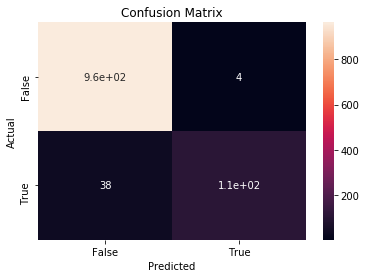

In [69]:
data = {'Actual': y_test,
        'Predicted': y_pred
        }

df = pd.DataFrame(data, columns=["Actual","Predicted"])
confusion_matrix = pd.crosstab(df["Actual"], df["Predicted"], rownames=["Actual"], colnames=["Predicted"])
sns.heatmap(confusion_matrix, annot=True)
plt.title("Confusion Matrix")
plt.show()

In [71]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [72]:
y_pred = model.predict(X_test)

In [73]:
print("Precision: {}".format(precision_score(y_test, y_pred)))
print("Recall: {}".format(recall_score(y_test, y_pred)))
print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))

Precision: 0.8928571428571429
Recall: 0.8389261744966443
Accuracy: 0.9650224215246637


In [74]:
 from sklearn.ensemble import ExtraTreesClassifier


In [75]:
model = ExtraTreesClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

In [76]:
y_pred = model.predict(X_test)

In [77]:
print("Precision: {}".format(precision_score(y_test, y_pred)))
print("Recall: {}".format(recall_score(y_test, y_pred)))
print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))

Precision: 1.0
Recall: 0.8523489932885906
Accuracy: 0.9802690582959641


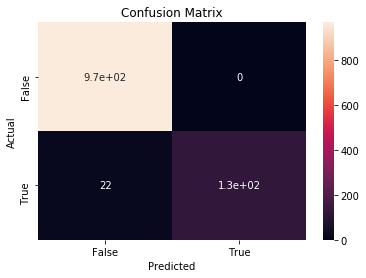

In [78]:
data = {'Actual': y_test,
        'Predicted': y_pred
        }

df = pd.DataFrame(data, columns=["Actual","Predicted"])
confusion_matrix = pd.crosstab(df["Actual"], df["Predicted"], rownames=["Actual"], colnames=["Predicted"])
sns.heatmap(confusion_matrix, annot=True)
plt.title("Confusion Matrix")
plt.show()